In [2]:
import numpy as np 
import pandas as pd
from sklearn.utils import shuffle

In [3]:
import matplotlib.pyplot as plt

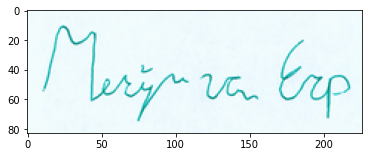

In [4]:
img_fraud_1 = plt.imread('../data/external/Dataset_Signature_Final/Dataset/dataset1/forge/02100001.png')
plt.imshow(img_fraud_1)

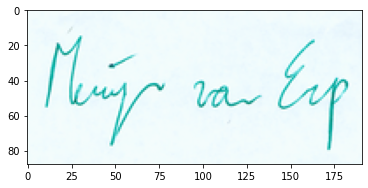

In [5]:
img_real_1 = plt.imread('../data/external/Dataset_Signature_Final/Dataset/dataset1/real/00100001.png')
plt.imshow(img_real_1)

In [6]:
import glob
gen = [glob.glob('../data/external/Dataset_Signature_Final/Dataset/dataset1/real/*.*'),
       glob.glob('../data/external/Dataset_Signature_Final/Dataset/dataset2/real/*.*'),
       glob.glob('../data/external/Dataset_Signature_Final/Dataset/dataset3/real/*.*'),
       glob.glob('../data/external/Dataset_Signature_Final/Dataset/dataset4/real1/*.*')]
                 
forg = [glob.glob('../data/external/Dataset_Signature_Final/Dataset/dataset1/forge/*.*'),
        glob.glob('../data/external/Dataset_Signature_Final/Dataset/dataset2/forge/*.*'),
        glob.glob('../data/external/Dataset_Signature_Final/Dataset/dataset3/forge/*.*'),
        glob.glob('../data/external/Dataset_Signature_Final/Dataset/dataset4/forge/*.*')]

In [7]:
# check the size of all the datasets
print(len(forg[2]))

150


In [8]:
# pip install opencv-python

In [18]:
import cv2
# print(cv2.__version__)

#save data into respective lists
train_data = []
train_labels = []

test_data = []
test_labels = []

In [19]:
#genuine data #0
for data in range(len(gen)):
#     print(gen[data])
    for i in gen[data]:
#         print(i)
        if data == 3:
            image = cv2.imread(i)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            
            image = cv2.resize(image, (512, 512))
            test_data.append(image)
            test_labels.append(0)
        else:
            image = cv2.imread(i)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (512, 512))
            train_data.append(image)
            train_labels.append(0)

#forged data #1
for data in range(len(forg)):
    for j in forg[data]:
        if data == 3:
            image = cv2.imread(j)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (512, 512))
            test_data.append(image)
            test_labels.append(1)
        else:
            image = cv2.imread(j)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (512, 512))
            train_data.append(image)
            train_labels.append(1) #forged = 1

In [20]:
type(train_data)

list

In [21]:
train_data = np.array(train_data)/255.0
train_labels = np.array(train_labels)

test_data = np.array(test_data)/255.0
test_labels = np.array(test_labels)

In [22]:
type(train_data)

numpy.ndarray

In [23]:
np.save("../data/interim/train_data.npy", train_data)
np.save("../data/interim/train_labels.npy", train_labels)
np.save("../data/interim/test_data.npy", test_data)
np.save("../data/interim/test_labels.npy", test_labels)

In [24]:
#test if data is loaded correctly
sample_train = np.load("../data/interim/train_data.npy", allow_pickle=True)
sample_train.shape

(540, 512, 512, 3)